In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from csvLoader import get_data
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_validate

# What is the effect of window size?

In [98]:
testAccuracies = list()
trainAccuracies = list()
cvResults = list()
for csvPATH in ["50_8"]:
    csvPATH =   "../data/dataset/statFeatures/stat{}.csv".format(csvPATH)
    data = get_data(PATH=csvPATH)
    features, pids, descriptions, labels = data.features, data.pids, data.descriptions, data.labels
    
    X_Train, X_Test, y_Train, y_Test = train_test_split(features,
                                        labels,
                                        test_size=0.2,
                                        shuffle=True,
                                        random_state=11)

    rf = RandomForestClassifier(n_estimators= 100, 
                            min_samples_split= 10,
                             min_samples_leaf= 5, 
                             max_features= 'auto',
                              max_depth= 10, 
                              bootstrap= False)
    
    #cvResult = cross_validate(rf, features, labels,cv=5)
    #cvResults.append(cvResult)
    rf.fit(X_Train, y_Train)

    testPreds = rf.predict(X_Test)
    trainPreds = rf.predict(X_Train)
    
    classReportTest = classification_report(y_Test,testPreds, output_dict=True, target_names= ["face", "non-face"])
    classReportTrain = classification_report(y_Train,trainPreds, output_dict=True, target_names= ["face", "non-face"])
    
    testAcc =accuracy_score(y_Test, testPreds)
    trainAcc =accuracy_score(y_Train, trainPreds)
    
    testAccuracies.append(testAcc)
    trainAccuracies.append(trainAcc)

     

############################################################
../data/dataset/statFeatures/stat20_8.csv
Data loaded from ../data/dataset/statFeatures/stat20_8.csv
############################################################
../data/dataset/statFeatures/stat30_8.csv
Data loaded from ../data/dataset/statFeatures/stat30_8.csv
############################################################
../data/dataset/statFeatures/stat40_8.csv
Data loaded from ../data/dataset/statFeatures/stat40_8.csv
############################################################
../data/dataset/statFeatures/stat50_8.csv
Data loaded from ../data/dataset/statFeatures/stat50_8.csv
############################################################
../data/dataset/statFeatures/stat60_8.csv
Data loaded from ../data/dataset/statFeatures/stat60_8.csv
############################################################
../data/dataset/statFeatures/stat70_8.csv
Data loaded from ../data/dataset/statFeatures/stat70_8.csv


In [103]:
testAccuracies

[0.8011695906432749,
 0.8456140350877193,
 0.8748538011695907,
 0.882903981264637,
 0.8747072599531616,
 0.9038686987104337]

In [104]:
trainAccuracies

[0.9663447468539654,
 0.9677985948477752,
 0.9677985948477752,
 0.9707088459285296,
 0.970398593200469,
 0.9730284374083846]

KeyError: 'train_score'

In [126]:
[np.mean(r["train_score"]) for r in cvResults]

[]

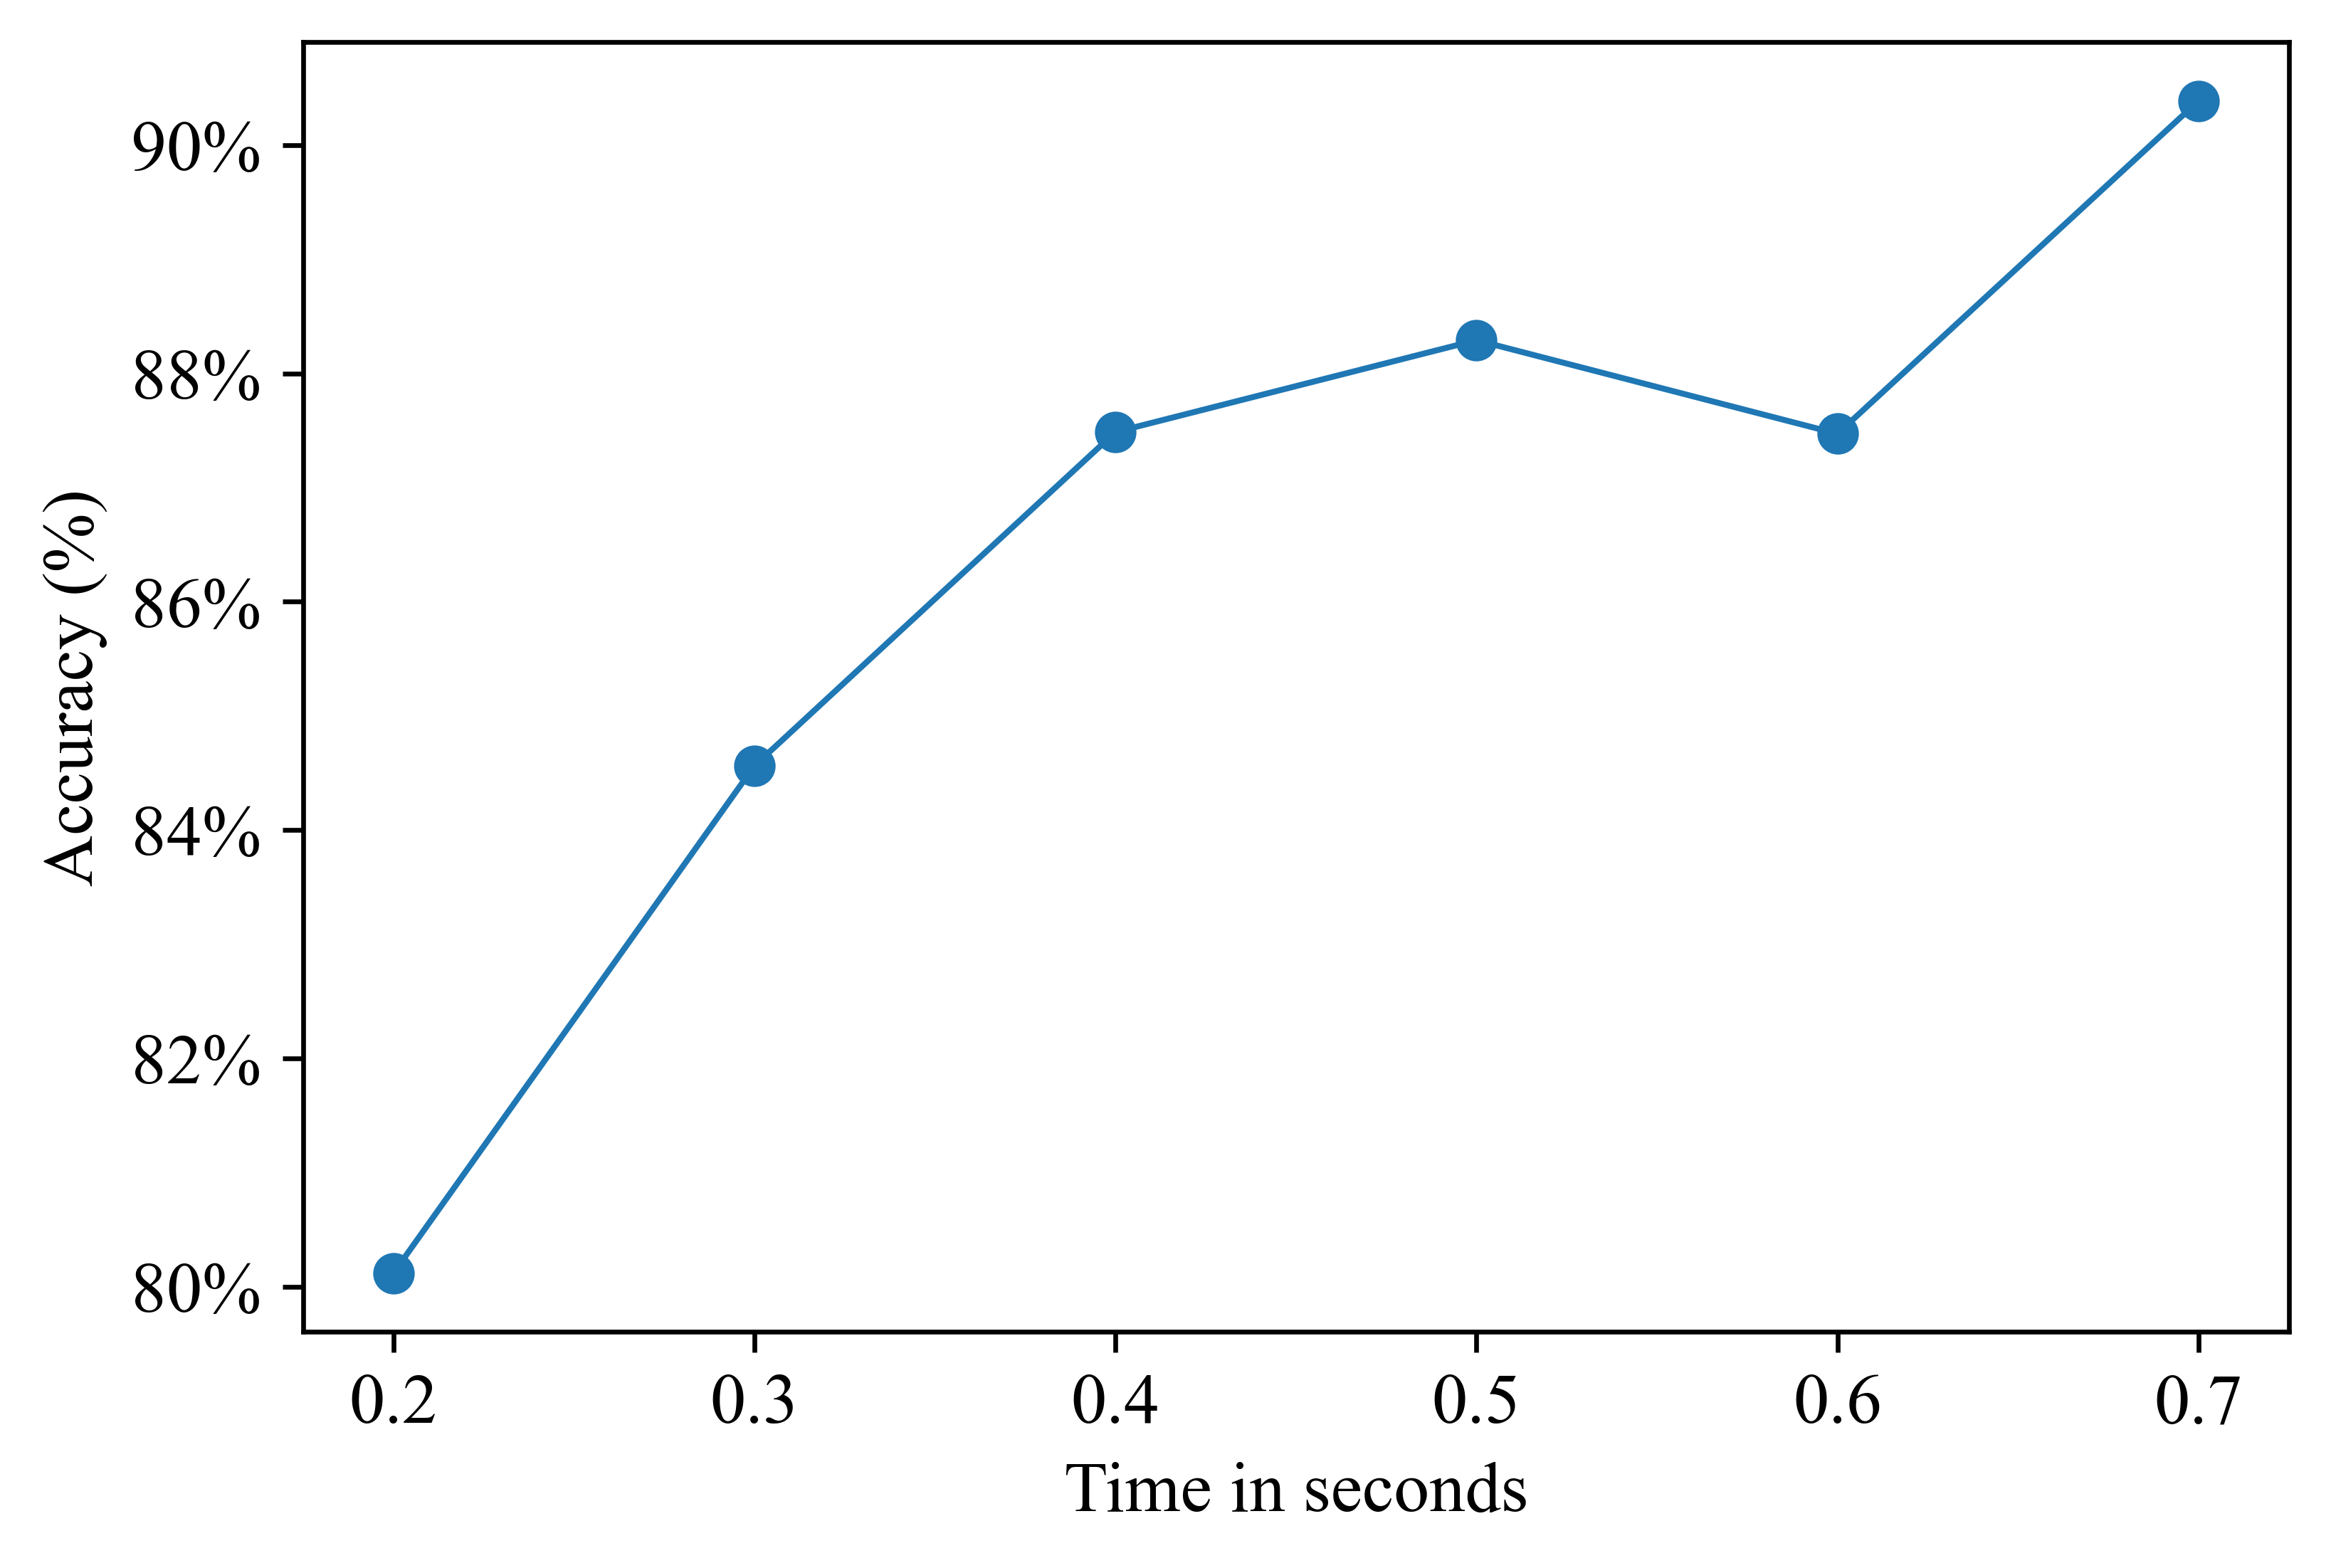

In [137]:
plt.rcParams['font.size'] = 12

plt.rcParams['hatch.linewidth'] = 0.25


plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 600
plt.rcParams["lines.linewidth"] = 1
plt.rcParams['hatch.linewidth'] = 0.15

#fig, axs = plt.subplots(1,2, figsize = (4,2), dpi = 600)

x = ["0.2", "0.3", "0.4", "0.5", "0.6","0.7"]
plt.plot(x,np.array(testAccuracies)*100, color = "tab:blue")
plt.scatter(x,np.array(testAccuracies)*100)

#plt.plot(x,testAccuracies, label="test")
plt.xlabel("Time in seconds")
plt.ylabel("Accuracy (%)")
plt.yticks([80,82,84,86,88,90],labels=["80%","82%","84%","86%","88%","90%"])
#plt.plot(x,trainAccuracies, label = "train")
#plt.legend()
plt.savefig("windowSelect.png")

[]

In [205]:
poly  = PolynomialFeatures(2)
X_TrainPoly = poly.fit_transform(X_Train)
#pipe = Pipeline([('poly',poly), ('rf', rf)])

In [216]:
X_TrainPoly[1000]#.shape

array([1.00000000e+00, 1.54984472e+00, 4.18301206e+00, ...,
       1.24325372e+04, 2.13232185e+08, 3.65717502e+12])

In [219]:
rf = RandomForestClassifier(n_estimators= 100, 
                            min_samples_split= 10,
                             min_samples_leaf= 5, 
                             max_features= 'auto',
                              max_depth= 10, 
                              bootstrap= False)
rf.fit(X_TrainPoly, y_Train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=5,
                       min_samples_split=10)

In [220]:

impDataSelect = np.array(list(zip(rf.feature_importances_, poly.get_feature_names(cols))))

impDfSelect = pd.DataFrame(impDataSelect, columns = ["val","feat"])

impDfSelect= impDf.sort_values(by="val", ascending=False)[:10]

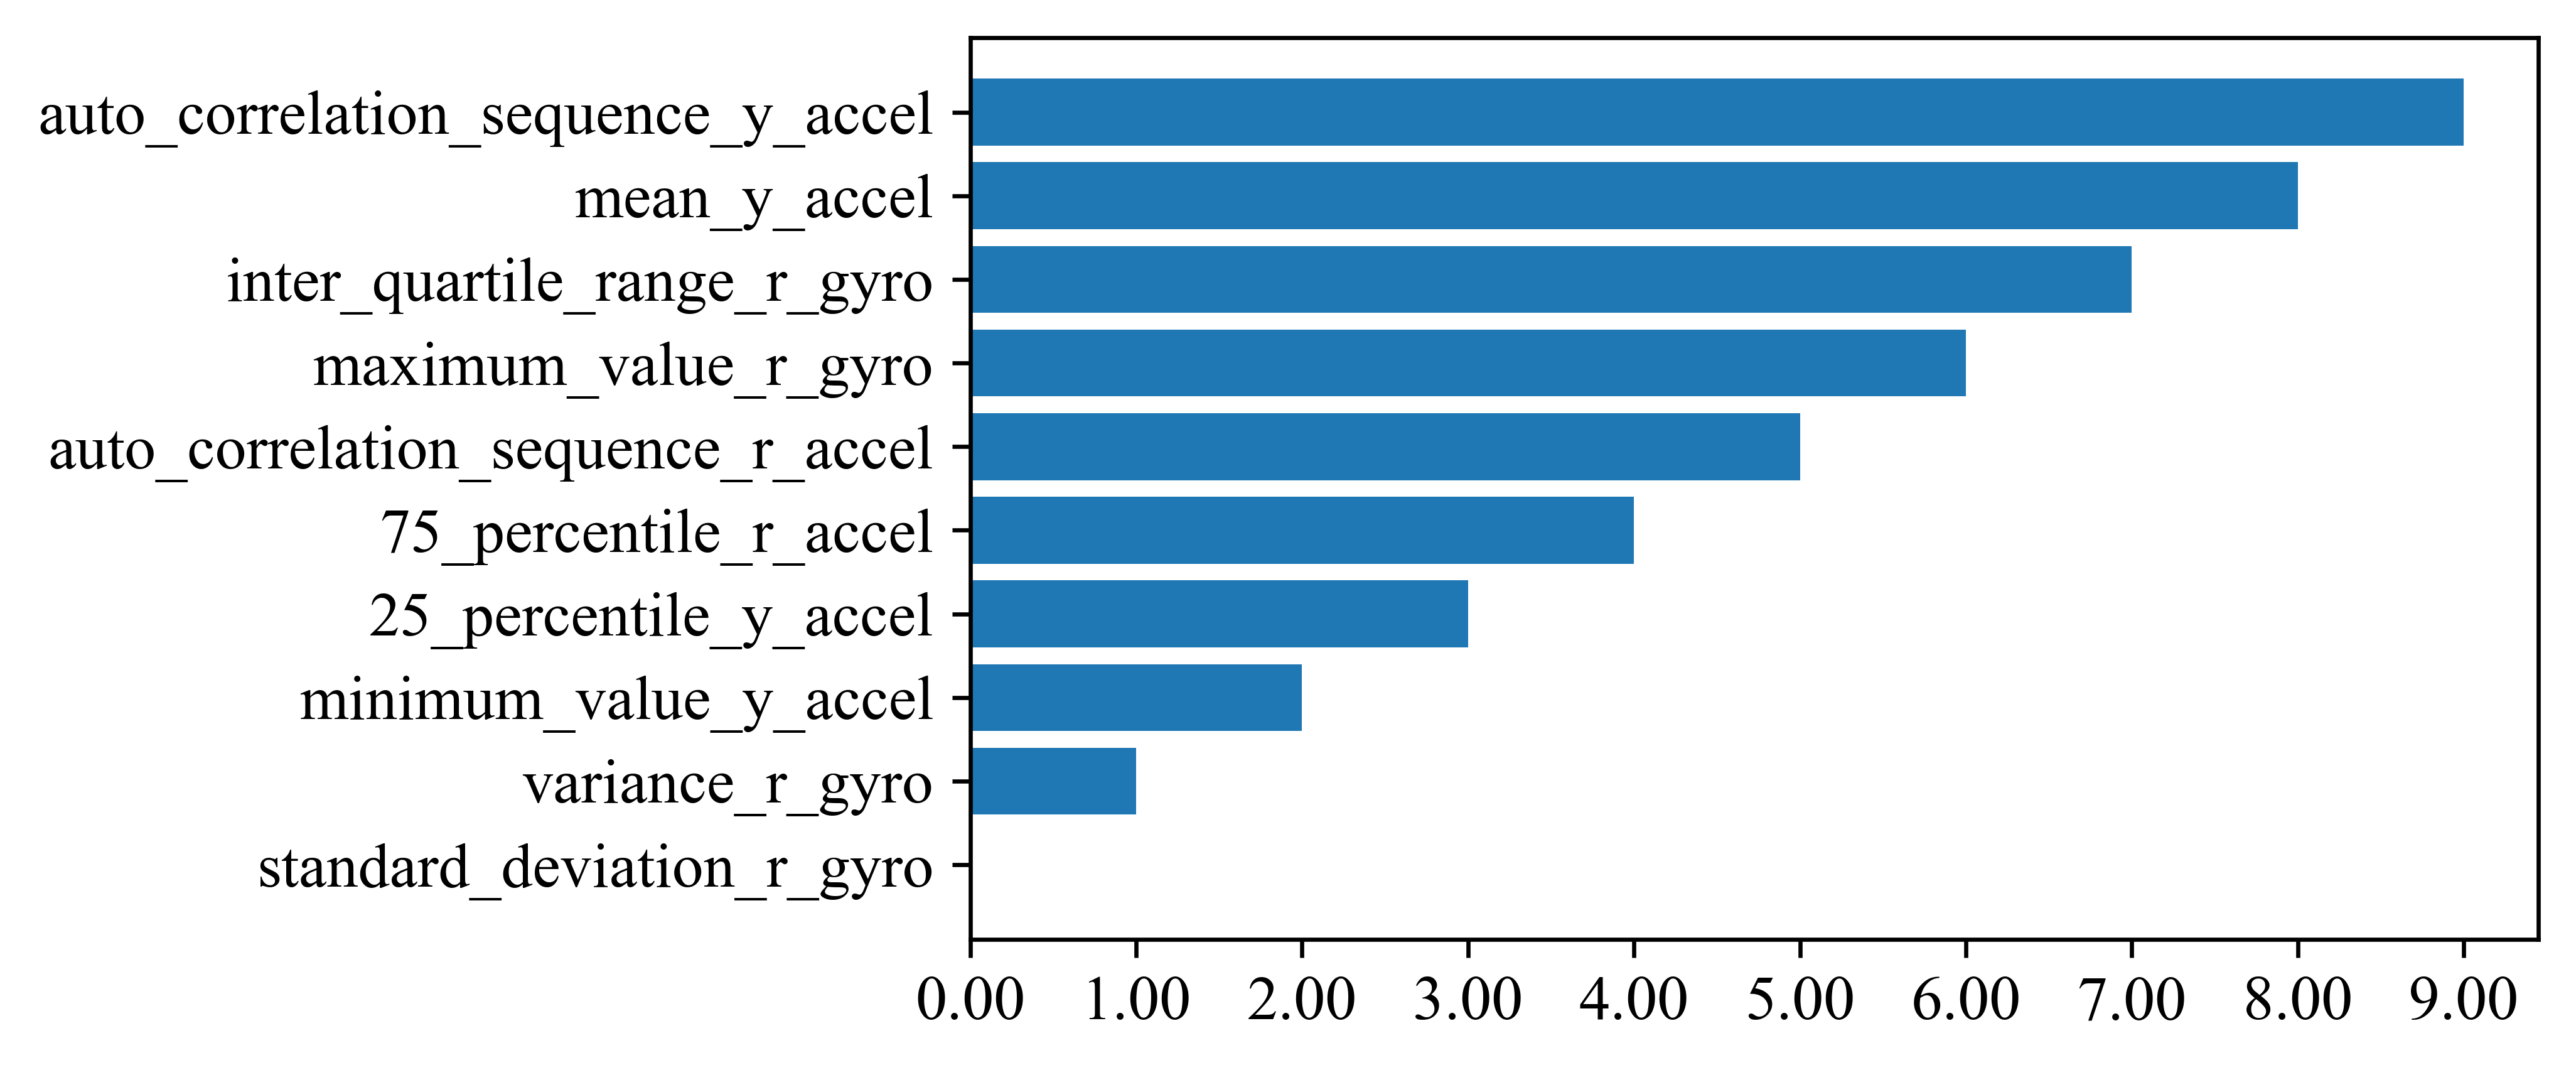

In [221]:
plt.rcParams['font.size'] = 12

plt.rcParams['hatch.linewidth'] = 0.25

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 600
plt.rcParams["lines.linewidth"] = 1
plt.rcParams['hatch.linewidth'] = 0.15
# plt.rcParams.update({'font.size': 20})
plt.figure(figsize= (7.0,3))

ax = plt.subplot()
ax.barh(impDfSelect["feat"].values,impDfSelect["val"].values)
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
#plt.savefig("rfImportance.png")

In [185]:
rfNorm = RandomForestClassifier(n_estimators= 100, 
                            min_samples_split= 10,
                             min_samples_leaf= 5, 
                             max_features= 'auto',
                              max_depth= 10, 
                              bootstrap= False)

In [229]:
rfNorm.fit(X_Train, y_Train)

RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=5,
                       min_samples_split=10)

In [ ]:
print(classification_report(rf.predict(X_Test), y_Test))

In [189]:
impData = np.array(list(zip(rfNorm.feature_importances_, cols)))
impDfNorm = pd.DataFrame(impData, columns = ["val","feat"])
#impDfSelectNorm= impDfNorm.sort_values(by="val", ascending=False)[:10]
impDfSelectNorm= impDfNorm.sort_values(by="val", ascending=False)

In [225]:
scores = list()
for selectItems in np.array(impDfSelectNorm.index).reshape(11,8):
    rfNorm.fit(X_Train[::,selectItems],y_Train)
    scores.append(accuracy_score(y_Test, rfNorm.predict(X_Test[::,selectItems])))

In [228]:
scores[-1
]

0.6154747948417351

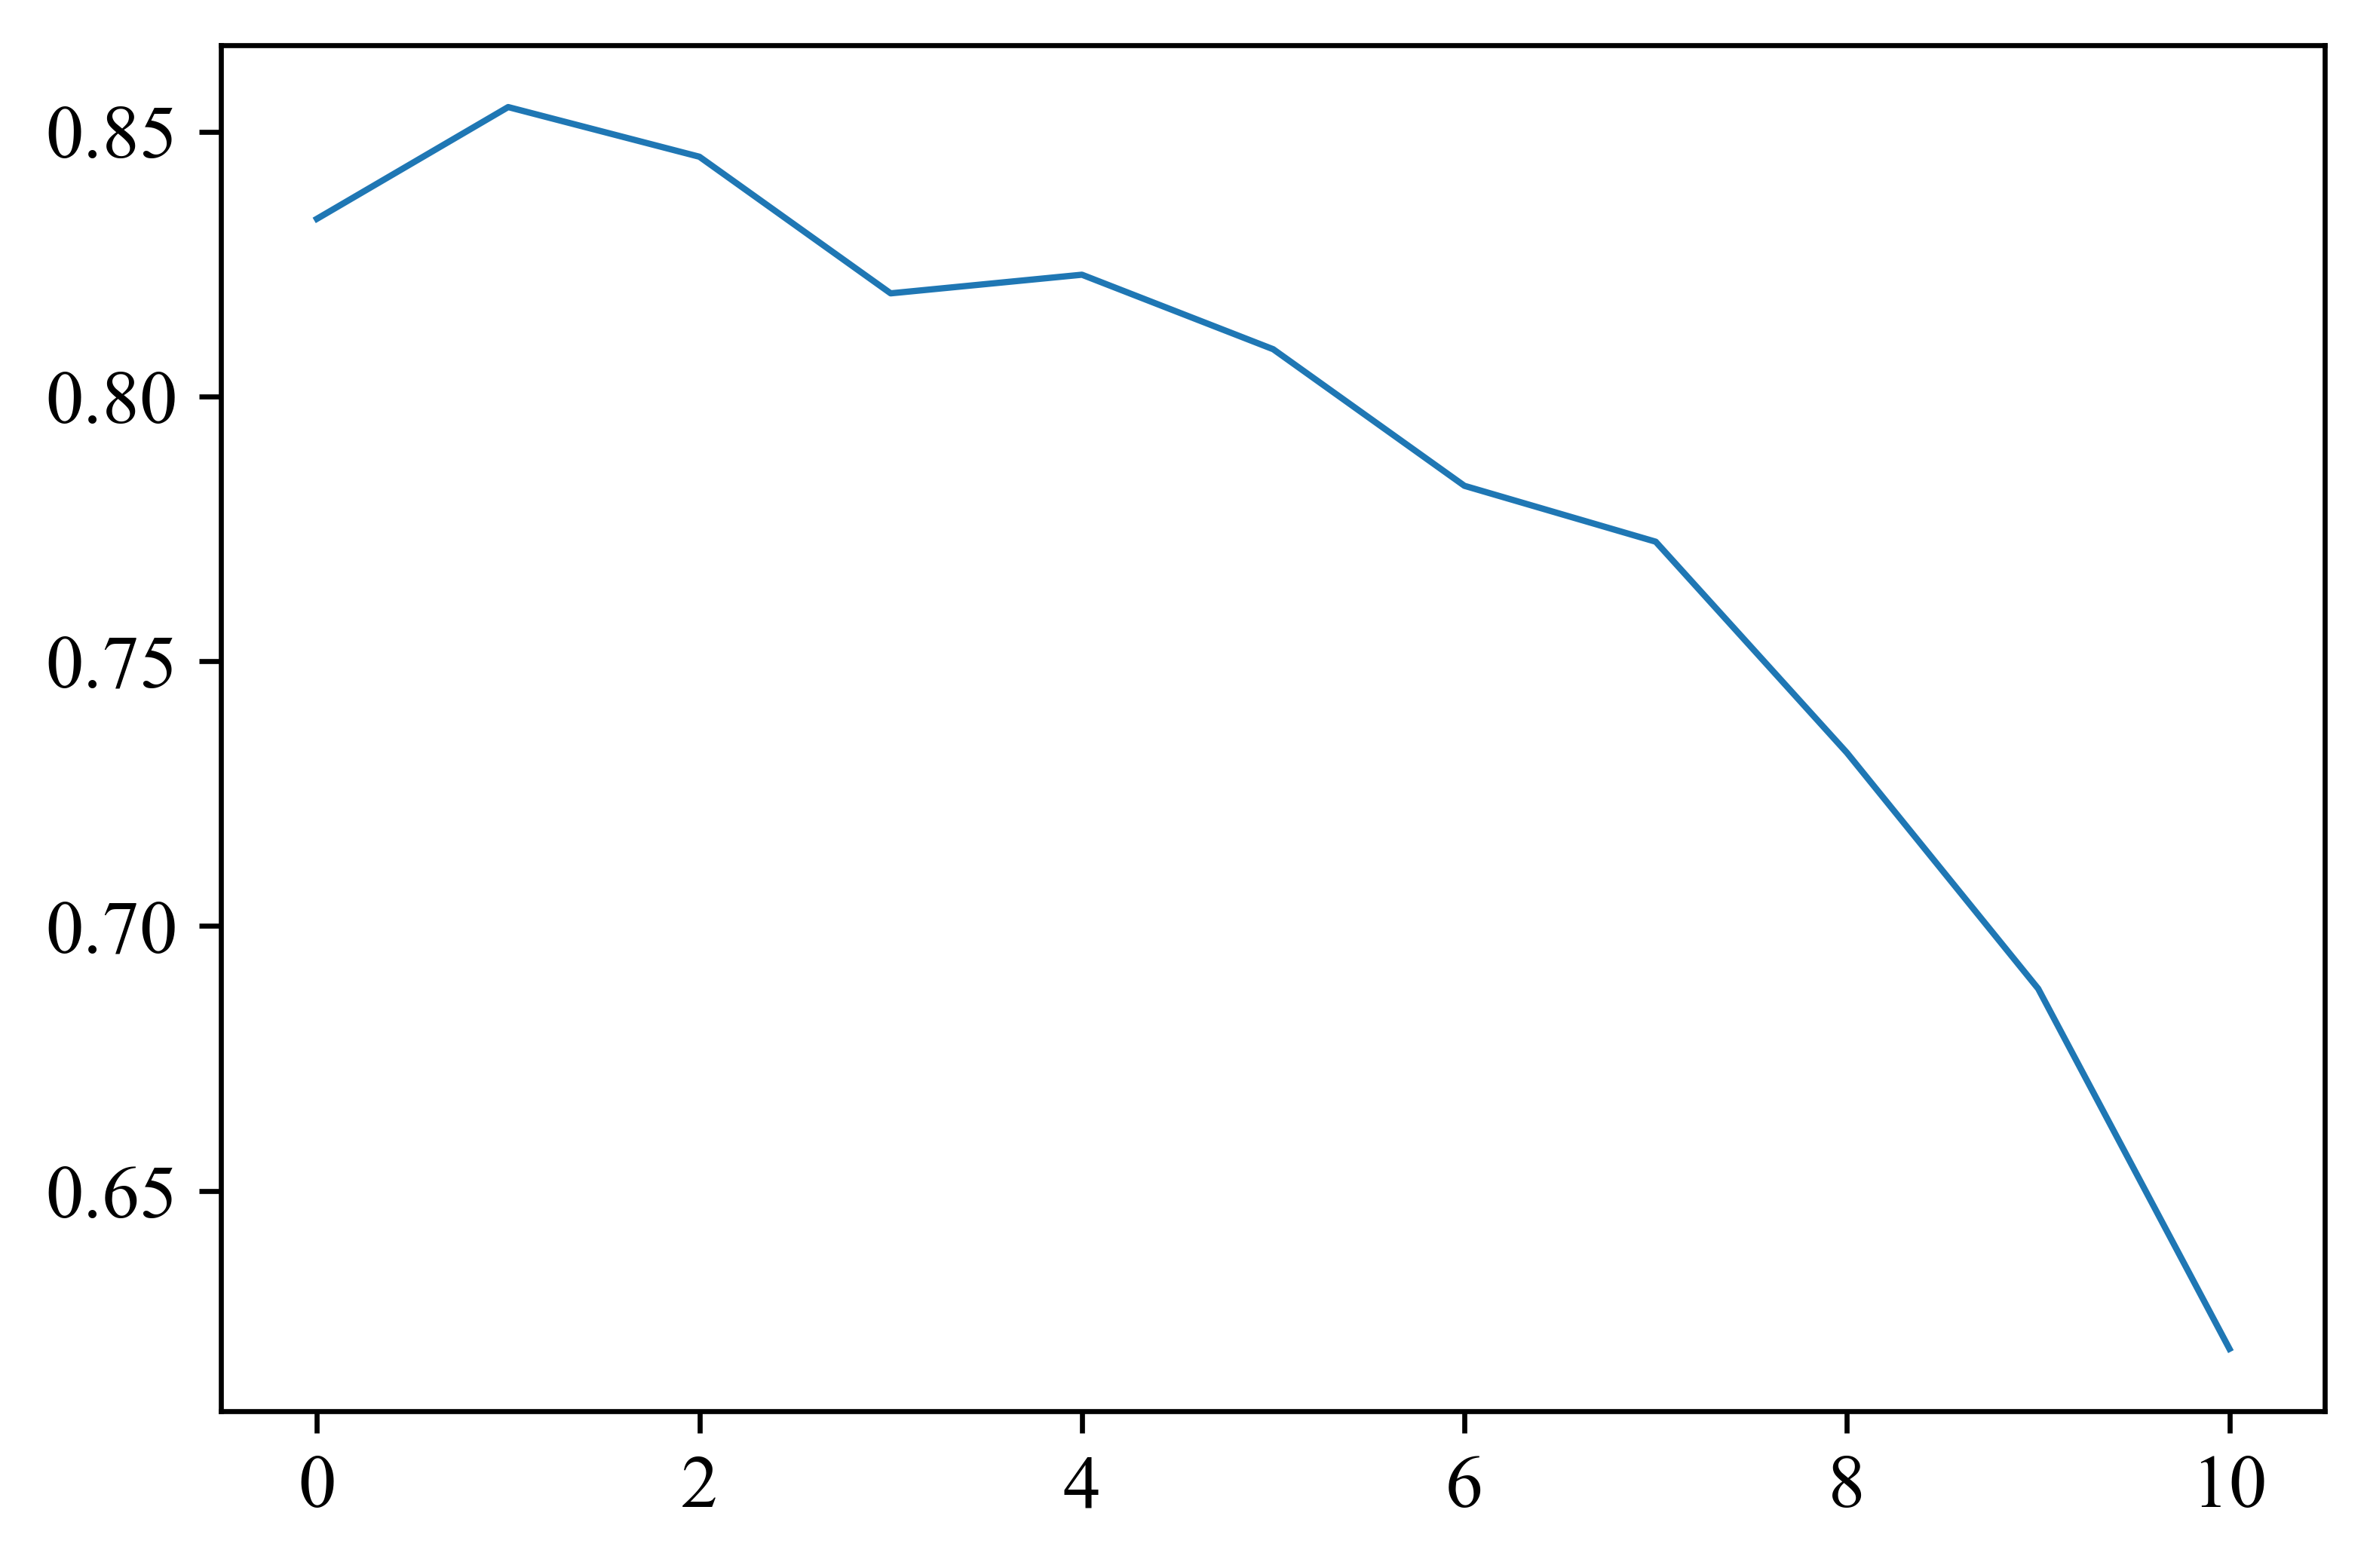

In [222]:
plt.plot(scores)

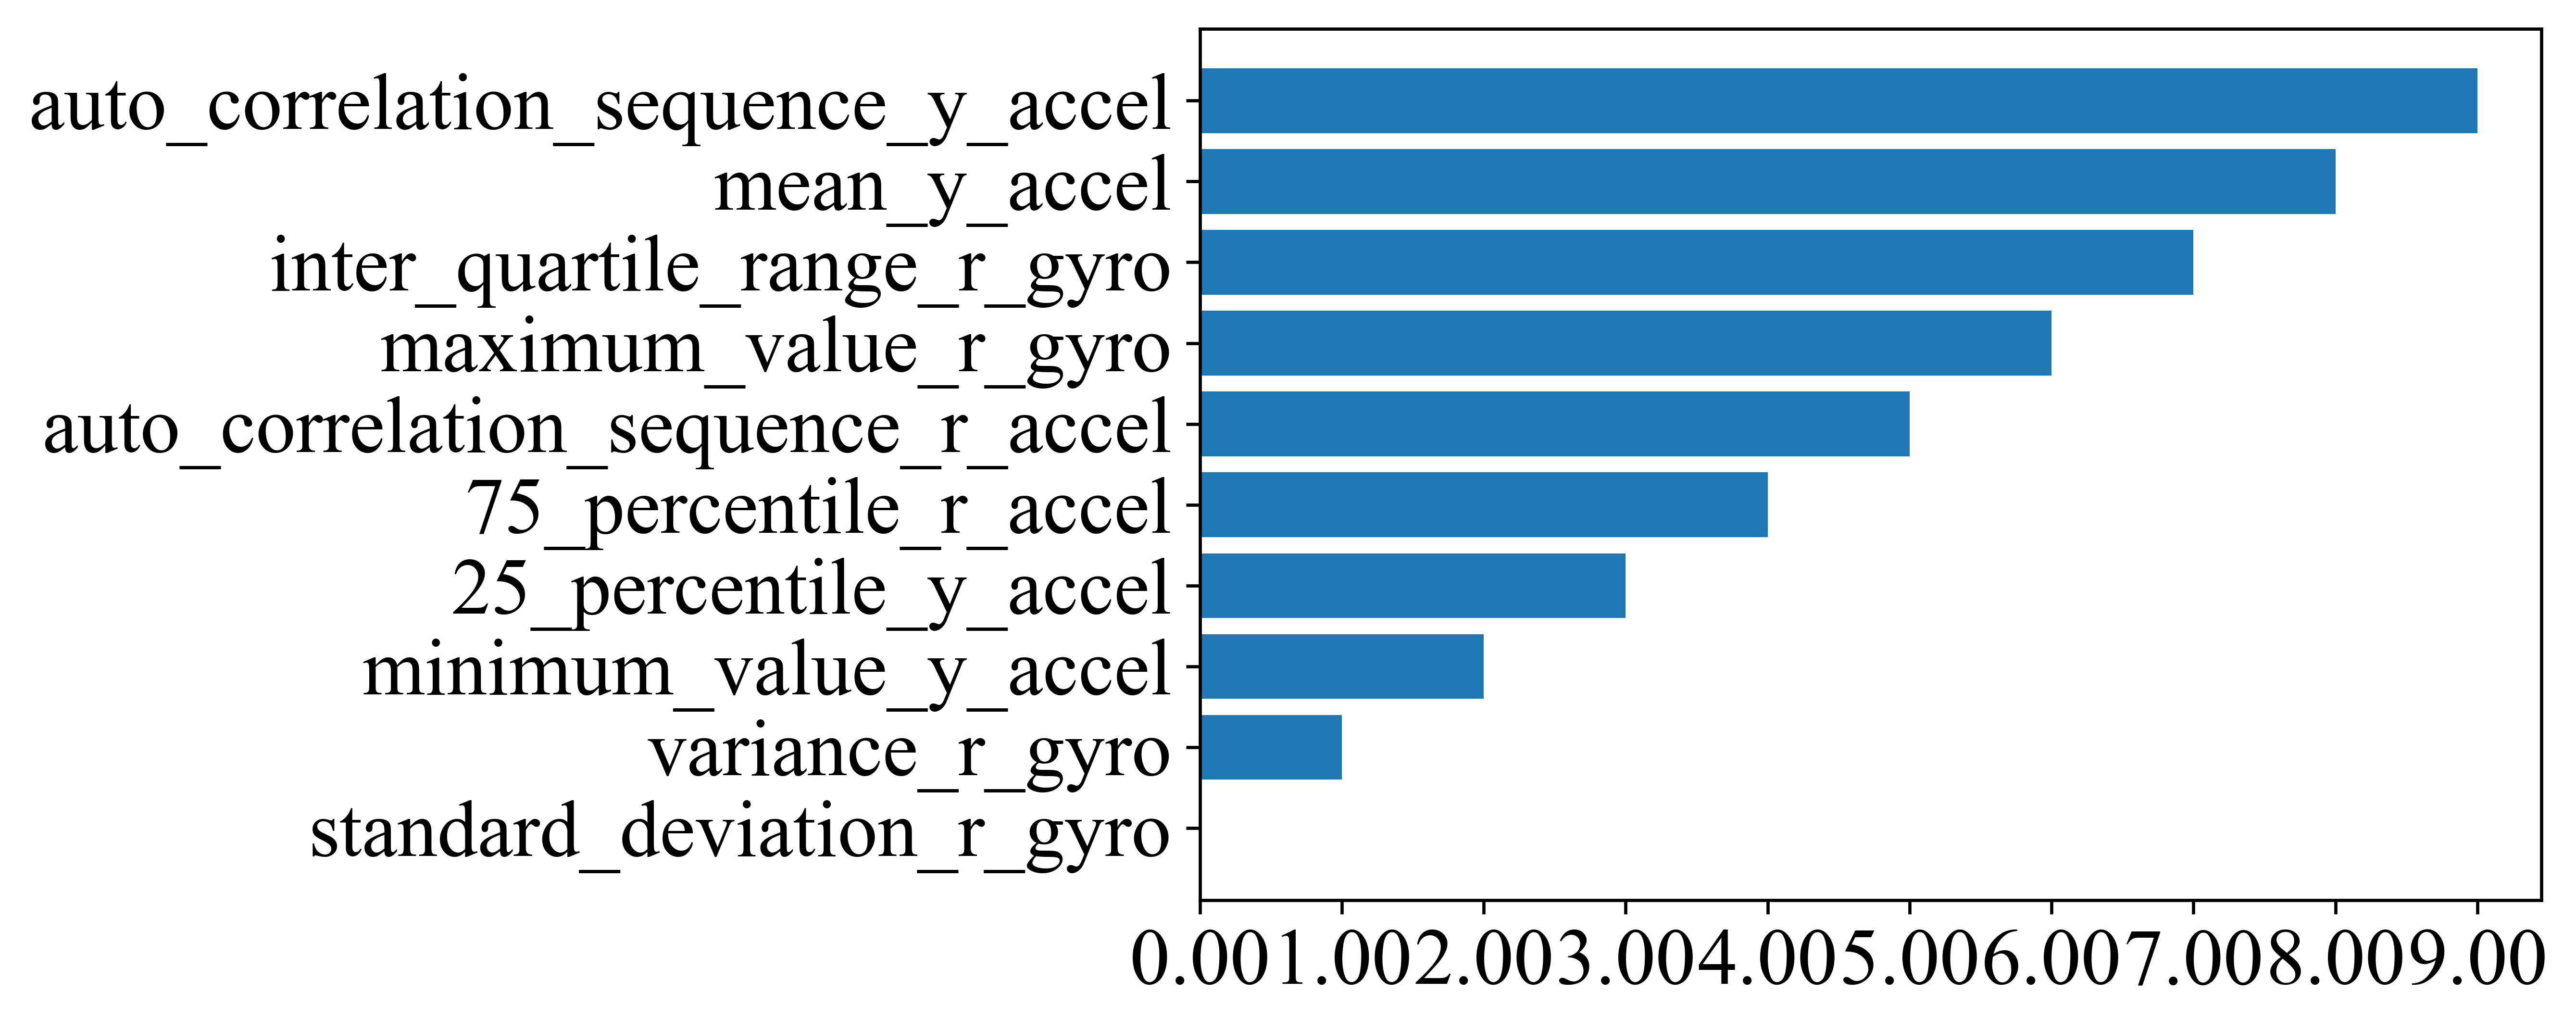

In [166]:

ax = plt.subplot()
ax.barh(impDfSelect["feat"].values,impDfSelect["val"].values)
#.xticks(FormatStrFormatter('%.2f'))
ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))


In [17]:
pipe['poly'].get_feature_names(cols)

['1',
 'mean_x_accel',
 'variance_x_accel',
 'standard_deviation_x_accel',
 'kurtosis_x_accel',
 'skewness_x_accel',
 'minimum_value_x_accel',
 'maximum_value_x_accel',
 '25_percentile_x_accel',
 '75_percentile_x_accel',
 'inter_quartile_range_x_accel',
 'auto_correlation_sequence_x_accel',
 'mean_y_accel',
 'variance_y_accel',
 'standard_deviation_y_accel',
 'kurtosis_y_accel',
 'skewness_y_accel',
 'minimum_value_y_accel',
 'maximum_value_y_accel',
 '25_percentile_y_accel',
 '75_percentile_y_accel',
 'inter_quartile_range_y_accel',
 'auto_correlation_sequence_y_accel',
 'mean_z_accel',
 'variance_z_accel',
 'standard_deviation_z_accel',
 'kurtosis_z_accel',
 'skewness_z_accel',
 'minimum_value_z_accel',
 'maximum_value_z_accel',
 '25_percentile_z_accel',
 '75_percentile_z_accel',
 'inter_quartile_range_z_accel',
 'auto_correlation_sequence_z_accel',
 'mean_r_accel',
 'variance_r_accel',
 'standard_deviation_r_accel',
 'kurtosis_r_accel',
 'skewness_r_accel',
 'minimum_value_r_accel',

In [15]:
from Heuristics import get_labels

In [16]:
cols = get_labels()